In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing vectors in 2D

The `plot_vectors` function plots a list of vectors in 2D space.

In [2]:
def plot_vectors(vectors, colors, scale=60):
    V = np.array([[0, 1], [1, 0]])  # ihat and jhat
    colors = ['k', 'k'] + colors
    V = np.vstack([V, np.hstack(vectors).T])
    
    plt.figure(figsize=(5, 5))
    plt.grid()
    
    origin = np.zeros(V.T.shape)
    plt.quiver(*origin, V[:,0], V[:,1], color=colors, scale=1, units='xy')
    
    lim = V.max() * 1.5
    
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    
    plt.show()

Let's look at some examples - $v_1$ and $v_2$

In [3]:
v1 = np.array([[2, 2]]).T
v2 = np.array([[-2, 3]]).T

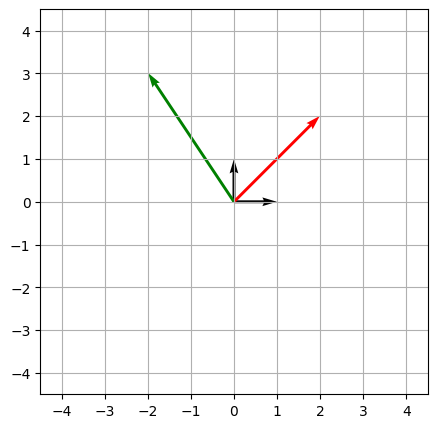

In [4]:
plot_vectors([v1, v2], colors=['r', 'g'])

# Matrix Transformation

Our given transformation is: 

- It transforms a vector $v=(-2, 3)$ to $v'=(1, 2)$
- It transforms a vector $w=(2, 2)$ to $w'=(4, -2)$

Let, $M$ be the transformation matrix.
we can calculate $M$ as follows:

- $Mv = v'$
- $Mw = w'$

Taking, $[v' w']$ is the matrix with $v'$ and $w'$ as its columns. Similarly, $[v w]$ is the matrix with $v$ and $w$ as its columns. We can write the above two equations as:

- $M [v w] = [v' w']$
- $M = [v' w'] [v w]^{-1}$


so, $M = \begin{bmatrix} 1 & 4 \\ 2 & -2 \end{bmatrix} \begin{bmatrix} -2 & 2 \\ 3 & 2 \end{bmatrix}^{-1}$

In [5]:
M = np.array([
    [1, 1],
    [-1, 0]
])

Say, $v = \hat{i} + 2\hat{j}$ and the transformed vector is $v_m = Mv$

Length scaled for v1= 1.5811388300841895
Length scaled for v2= 0.6201736729460423


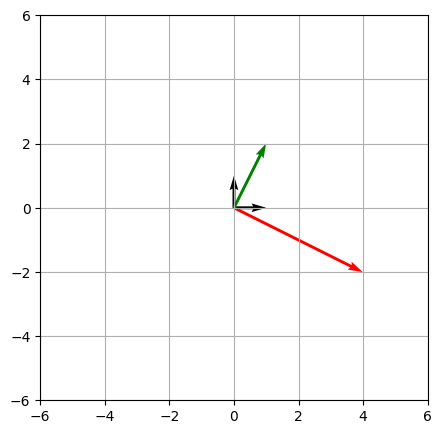

In [6]:
v1_m = M.dot(v1)
v2_m = M.dot(v2)
print(f'Length scaled for v1= {np.linalg.norm(v1_m) / np.linalg.norm(v1)}')
print(f'Length scaled for v2= {np.linalg.norm(v2_m) / np.linalg.norm(v2)}')
plot_vectors([v1_m, v2_m], colors=['r', 'g'])

Red arrow shows the original vector and the green arrow shows the transformed vector. 

After transformation, two things happen to the transformed vector

1. It may chage direction
2. It may change length

Let's see how our basis vectors $\hat{i}$ and $\hat{j}$ gets transformed.

Transformed vector: [[ 1 -1]]
1st column of M: [ 1 -1]


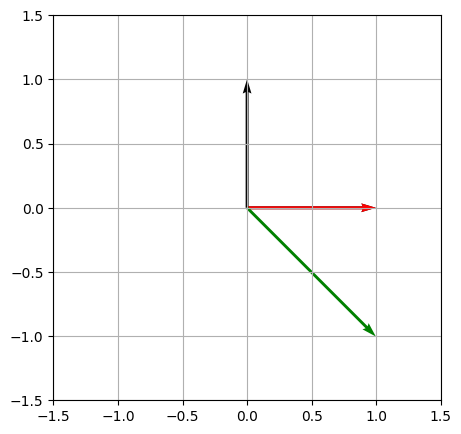

In [7]:
v = np.array([[1, 0]]).T # i_hat
v_m = M.dot(v)
print(f'Transformed vector: {v_m.T}')
print(f'1st column of M: {M[:, 0]}')
plot_vectors([v, v_m], colors=['r', 'g'])

Transformed vector: [[1 0]]
2nd column of M: [1 0]


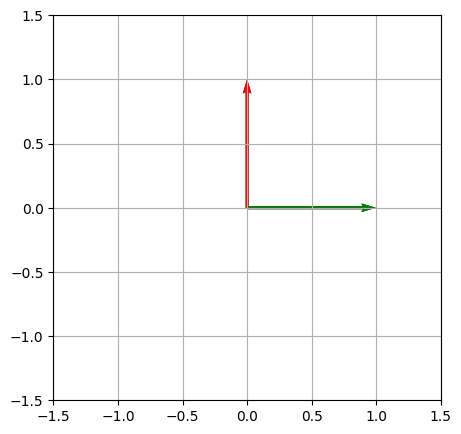

In [8]:
v = np.array([[0, 1]]).T  # j_hat
v_m = M.dot(v)
print(f'Transformed vector: {v_m.T}')
print(f'2nd column of M: {M[:, 1]}')
plot_vectors([v, v_m], colors=['r', 'g'])

Can you notice the similarities between transformed vectors and colums of $M$? [Hint](https://i.imgur.com/mWQjR2C.png)

Please watch [the amazing explanation](https://youtu.be/kYB8IZa5AuE) from [3Blue1Brown](https://www.youtube.com/@3blue1brown).

# Eigen Decomposition

Let's look at a special vector, $v_e = \hat{i}$

Length scaled 1.4142135623730951


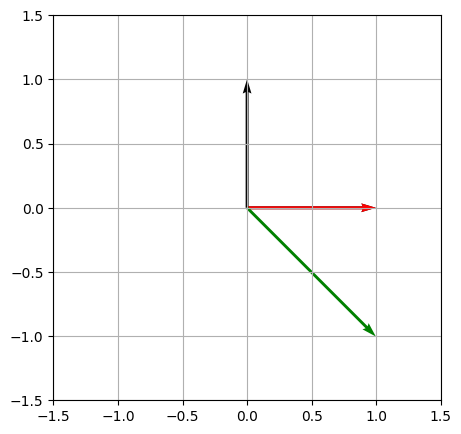

In [9]:
v_e = np.array([[1, 0]]).T
v_em = M.dot(v_e)
print(f'Length scaled {np.linalg.norm(v_em) / np.linalg.norm(v_e)}')
plot_vectors([v_e, v_em], colors=['r', 'g'])

As you can see the transformed vector stayed on the same line as $v_e$.

These kinds of vectors are called eigenvectors of $M$.

You can find there by applying eigenvalue decomposition.

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(M)

In [11]:
eigen_values

array([0.5+0.8660254j, 0.5-0.8660254j])

In [12]:
eigen_vectors

array([[ 0.35355339+0.61237244j,  0.35355339-0.61237244j],
       [-0.70710678+0.j        , -0.70710678-0.j        ]])

Let's plot these before and after transformation

Eigenvector [[ 0.35355339+0.61237244j -0.70710678+0.j        ]]
Eigenvalue (0.49999999999999994+0.8660254037844386j)
Length scaled 1.0


/home/akib/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akib/.local/lib/python3.10/site-packages/matplotlib/transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


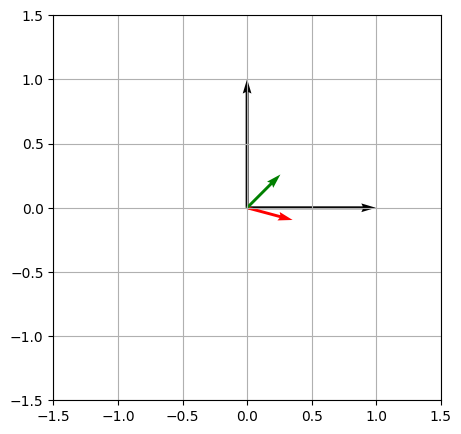

Eigenvector [[ 0.35355339-0.61237244j -0.70710678-0.j        ]]
Eigenvalue (0.49999999999999994-0.8660254037844386j)
Length scaled 1.0


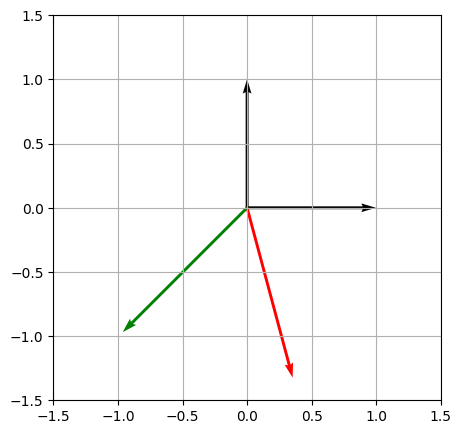

In [13]:
for i in range(eigen_vectors.shape[0]):
    v = eigen_vectors[:, i].reshape(2, 1)
    v_m = M.dot(v)
    print(f'Eigenvector {v.T}')
    print(f'Eigenvalue {eigen_values[i]}')
    print(f'Length scaled {np.linalg.norm(v_m) / np.linalg.norm(v)}')
    plot_vectors([v, v_m], colors=['r', 'g'])

As you have probably noticed, eigenvalue denotes the amount of scaling after transformation. 

Let's denote this as $\lambda$. Then we get a concise equation

$$ Mv = \lambda v $$